In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [5]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [6]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [7]:
df.shape

(103, 7)

In [8]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] =df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [9]:
df.rename(columns = {'Production (Tons)':"Production_(Tons)"},inplace = True)
df.rename(columns = {'Production per Person (Kg)':"Production_per_Person(Kg)"},inplace = True)
df.rename(columns = {'Acreage (Hectare)':"Acreage_(Hectare)"},inplace = True)
df.rename(columns = {'Yield (Kg / Hectare)':"Yield_(Kg/Hectare)"},inplace = True)

In [10]:
df.head()

,Unnamed: 0,Country,Continent,Production_(Tons),Production_per_Person(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [11]:
df.rename(columns = {'Production (Tons)':"Production_(Tons)"},inplace = True)
df.rename(columns = {'Production per Person (Kg)':"Production_per_Person(Kg)"},inplace = True)
df.rename(columns = {'Acreage (Hectare)':"Acreage_(Hectare)"},inplace = True)
df.rename(columns = {'Yield (Kg / Hectare)':"Yield_(Kg/Hectare)"},inplace = True)

In [12]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production_(Tons)            0
Production_per_Person(Kg)    0
Acreage_(Hectare)            1
Yield_(Kg/Hectare)           1
dtype: int64

In [13]:
df = df.dropna().reset_index()

In [14]:
df.drop(['index','Unnamed: 0'],axis=1 , inplace =True)

In [15]:
df.dtypes

Country                      object
Continent                    object
Production_(Tons)            object
Production_per_Person(Kg)    object
Acreage_(Hectare)            object
Yield_(Kg/Hectare)           object
dtype: object

In [16]:
df['Production_(Tons)'] = df['Production_(Tons)'].astype(float)
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df['Acreage_(Hectare)'] = df['Acreage_(Hectare)'].astype(float)
df['Yield_(Kg/Hectare)'] = df['Yield_(Kg/Hectare)'].astype(float)

In [17]:
df.dtypes

Country                       object
Continent                     object
Production_(Tons)            float64
Production_per_Person(Kg)    float64
Acreage_(Hectare)            float64
Yield_(Kg/Hectare)           float64
dtype: object

In [18]:
df.nunique()

Country                      102
Continent                      6
Production_(Tons)            102
Production_per_Person(Kg)    101
Acreage_(Hectare)            101
Yield_(Kg/Hectare)           102
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

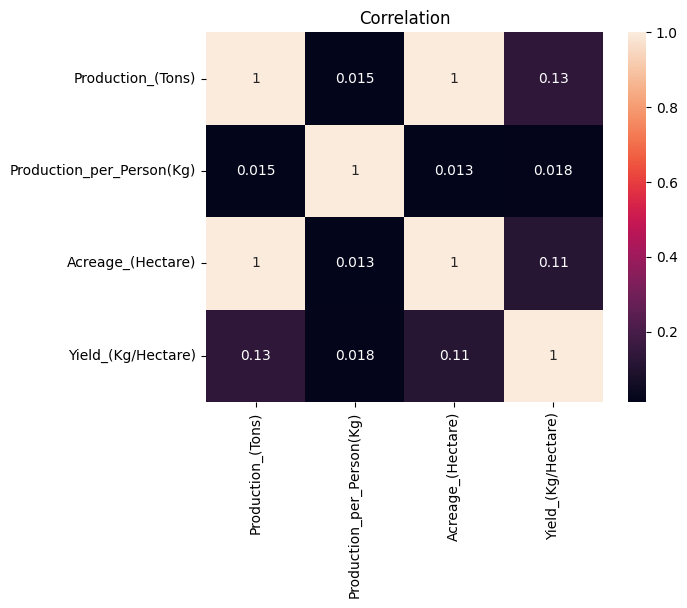

In [54]:
data_corr = df.select_dtypes(['float64']).corr()
sns.heatmap(data_corr,annot=True)
plt.title('Correlation')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

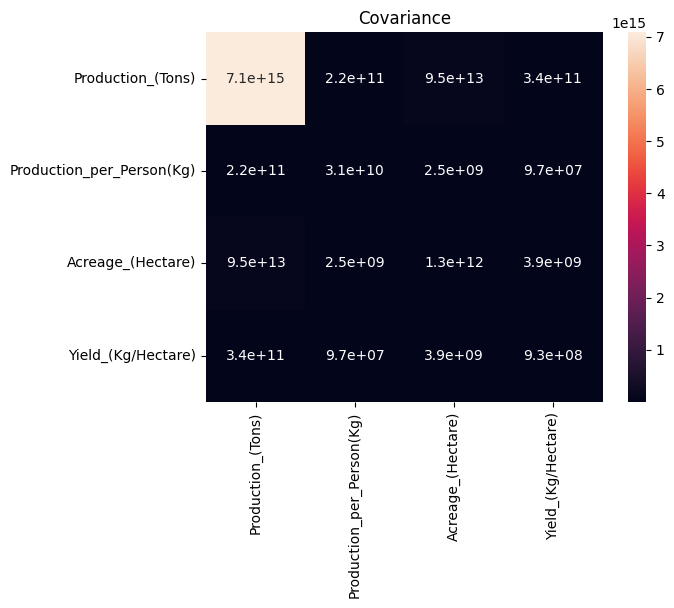

In [56]:
data_cov = df.select_dtypes(['float64']).cov()
sns.heatmap(data_cov,annot=True)
plt.title('Covariance')
plt.show

In [58]:
df.shape

(102, 6)

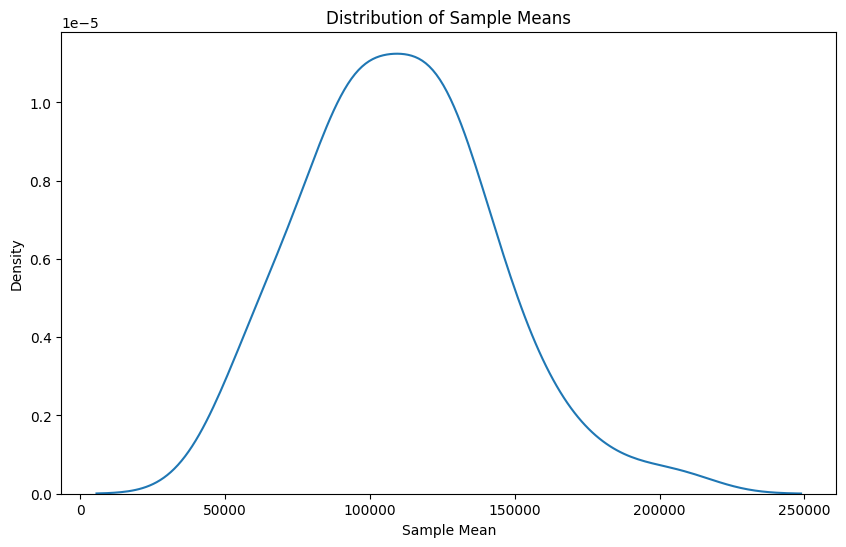

In [65]:
no_sample = 60
sample_size = 30 

samp_mean = []
for _ in range(no_sample):
    samp_data = np.random.choice(df['Production_per_Person(Kg)'], sample_size, replace=True)
    samp_mean.append(np.mean(samp_data))
sample_mean_df = pd.DataFrame({"Sample Mean": samp_mean})

plt.figure(figsize=(10, 6))
sns.kdeplot(x="Sample Mean", data=sample_mean_df)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

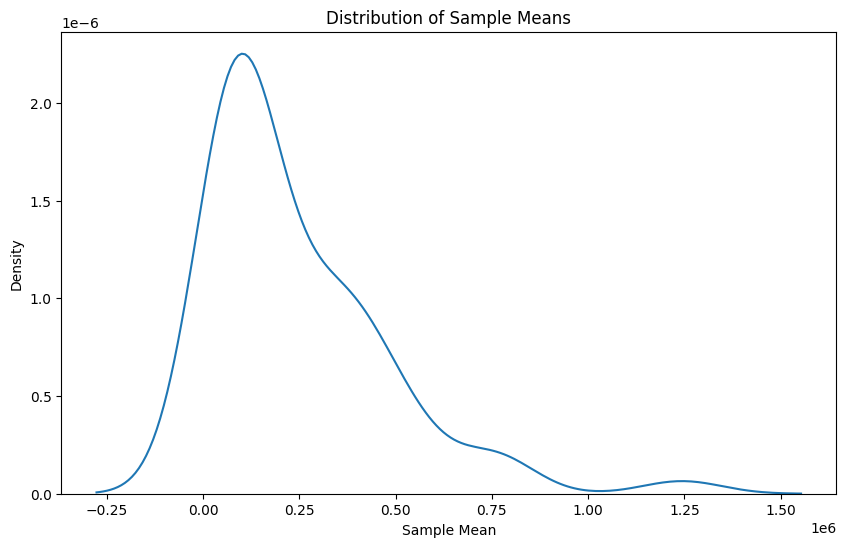

In [69]:
no_sample = 60
sample_size = 30 

samp_mean = []
for _ in range(no_sample):
    samp_data = np.random.choice(df['Acreage_(Hectare)'], sample_size, replace=True)
    samp_mean.append(np.mean(samp_data))
sample_mean_df = pd.DataFrame({"Sample Mean": samp_mean})

plt.figure(figsize=(10, 6))
sns.kdeplot(x="Sample Mean", data=sample_mean_df)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

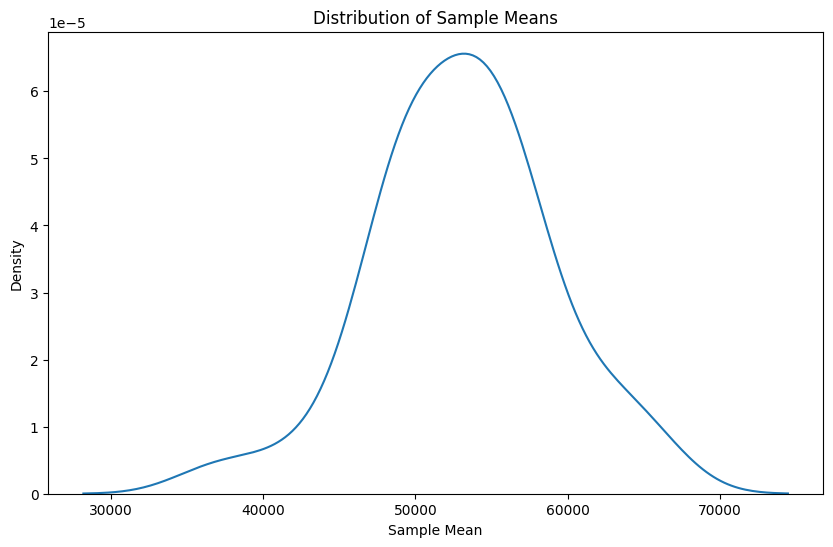

In [71]:
no_sample = 50
sample_size = 30 

samp_mean = []
for _ in range(no_sample):
    samp_data = np.random.choice(df['Yield_(Kg/Hectare)'], sample_size, replace=True)
    samp_mean.append(np.mean(samp_data))
sample_mean_df = pd.DataFrame({"Sample Mean": samp_mean})

plt.figure(figsize=(10, 6))
sns.kdeplot(x="Sample Mean", data=sample_mean_df)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

## Univariate Ananlysis

In [20]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

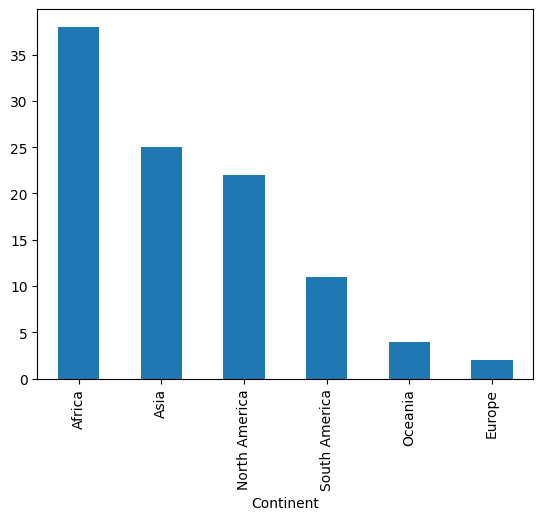

In [21]:
df['Continent'].value_counts().plot(kind='bar')

C:\Users\aksha\AppData\Local\Temp\ipykernel_22264\2510286269.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_(Tons)'])
C:\Users\aksha\AppData\Local\Temp\ipykernel_22264\2510286269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person(Kg)'])
C:\Users\aks

<Axes: xlabel='Yield_(Kg/Hectare)', ylabel='Density'>

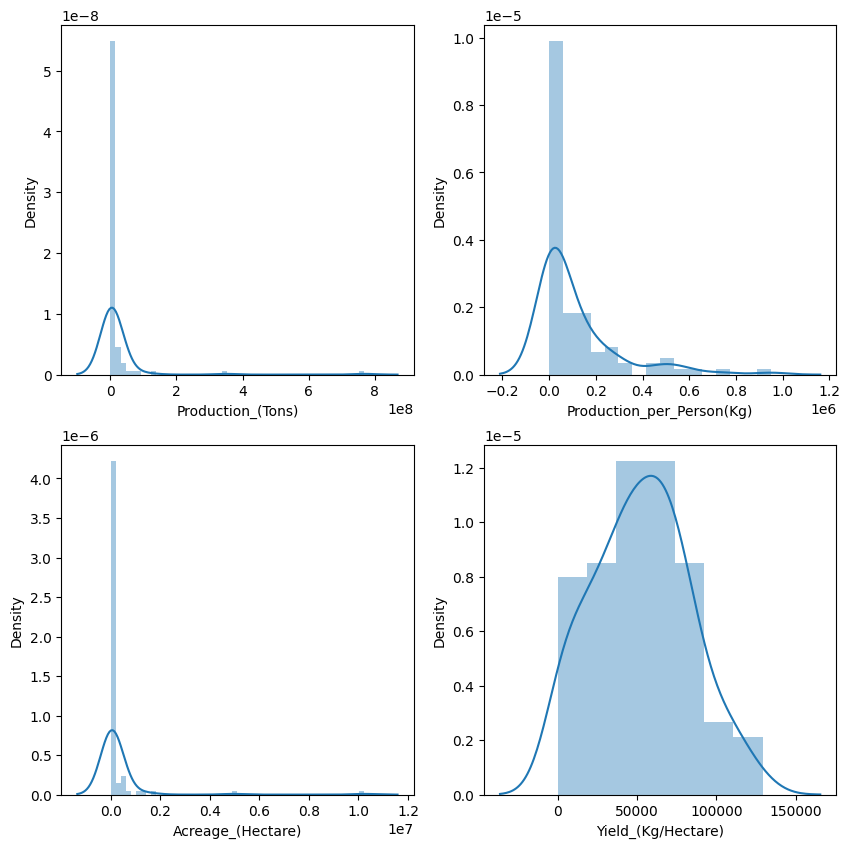

In [22]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production_(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage_(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield_(Kg/Hectare)'])

<Axes: ylabel='Yield_(Kg/Hectare)'>

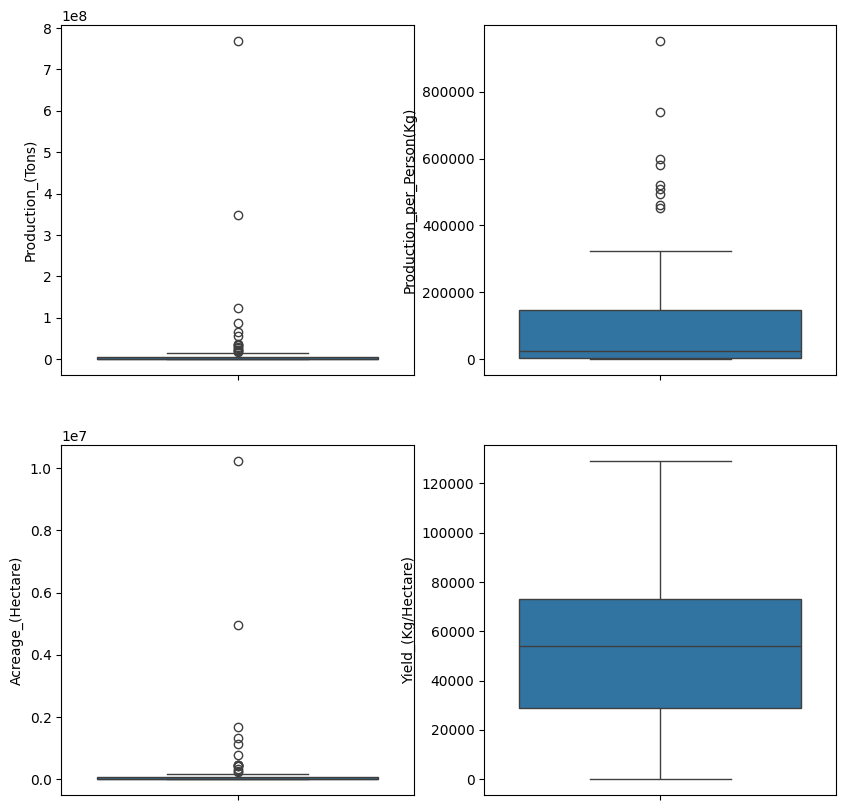

In [23]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production_(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage_(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield_(Kg/Hectare)'])

In [24]:
df.describe()

,Production_(Tons),Production_per_Person(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

In [25]:
df.head()

,Country,Continent,Production_(Tons),Production_per_Person(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [26]:
df_new = df[['Country','Production_(Tons)']].set_index('Country')
df_new['Production_(Tons)_percent']= df_new['Production_(Tons)'] *100/df_new['Production_(Tons)'].sum()

In [27]:
df_new

,Production_(Tons),Production_(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production_(Tons)_percent'>

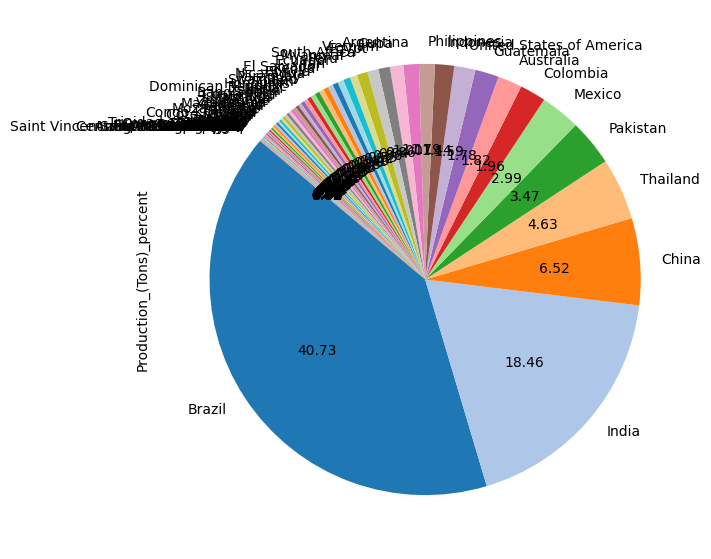

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
df_new['Production_(Tons)_percent'].plot(kind = 'pie',autopct='%.2f',startangle=140,colors=plt.cm.tab20.colors)

C:\Users\aksha\AppData\Local\Temp\ipykernel_22264\3052502702.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


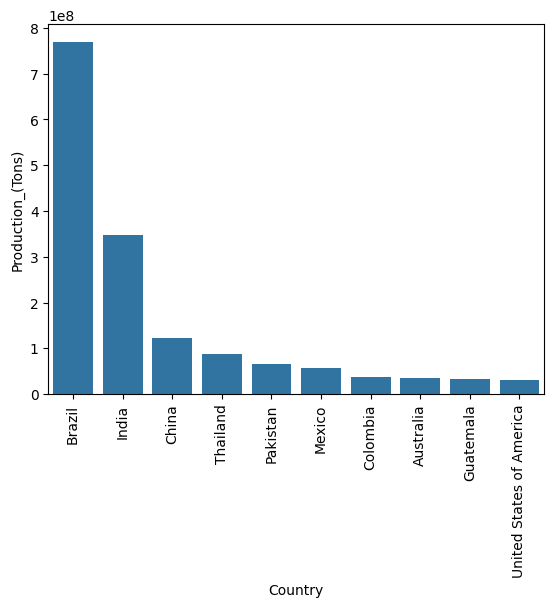

In [29]:
df_prod = df.sort_values("Production_(Tons)",ascending = False)
ax = sns.barplot(data = df_prod.head(10), x = 'Country', y = 'Production_(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_22264\3110771825.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


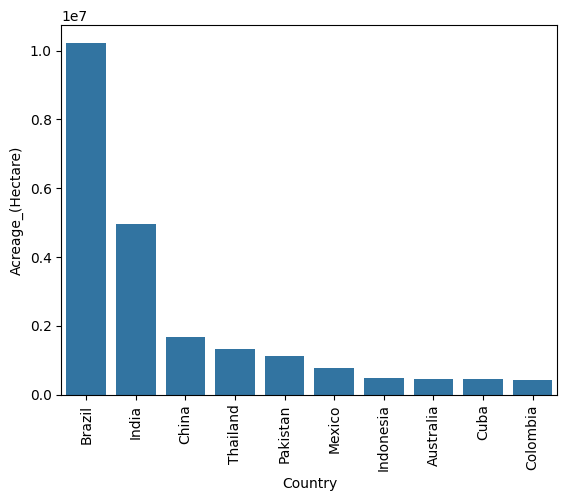

In [30]:
df_acr = df.sort_values("Acreage_(Hectare)",ascending = False)
ax = sns.barplot(data = df_acr.head(10), x = 'Country', y = 'Acreage_(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_22264\2075783951.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


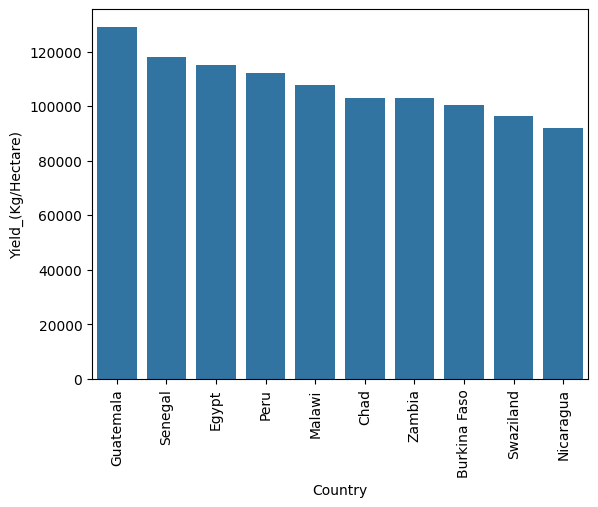

In [31]:
df_yield = df.sort_values("Yield_(Kg/Hectare)",ascending = False)
ax = sns.barplot(data = df_yield.head(10), x = 'Country', y = 'Yield_(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [32]:
df.corr(numeric_only = True)

,Production_(Tons),Production_per_Person(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
Production_(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage_(Hectare),0.997550,0.012557,1.000000,0.113433
Yield_(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

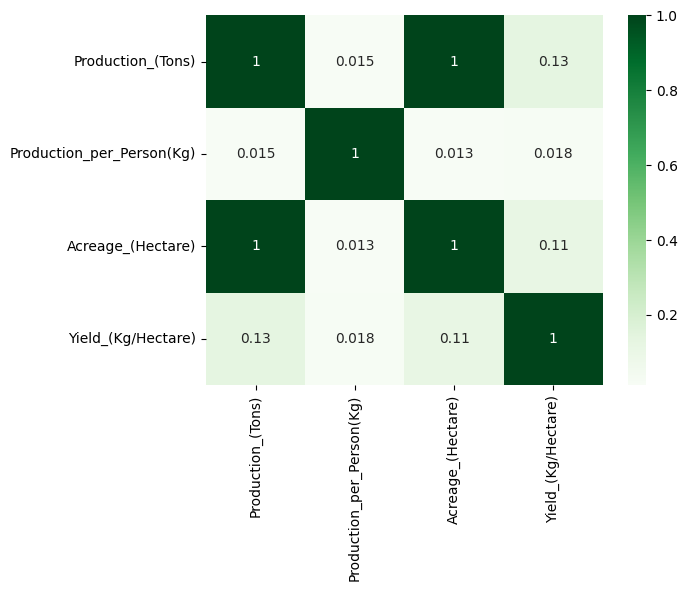

In [33]:
sns.heatmap(df.corr(numeric_only = True),annot=True , cmap = "Greens")

<Axes: xlabel='Yield_(Kg/Hectare)', ylabel='Production_(Tons)'>

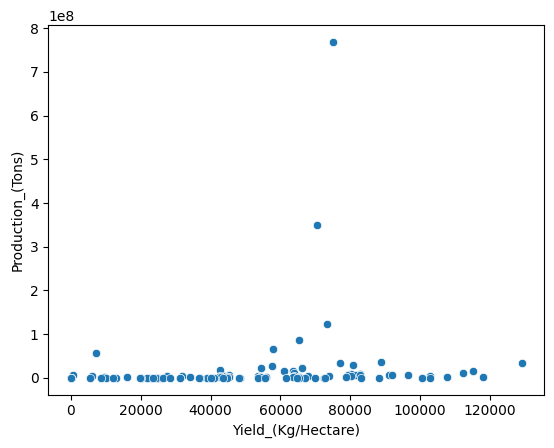

In [34]:
sns.scatterplot(data = df , x = "Yield_(Kg/Hectare)", y = 'Production_(Tons)')

<Axes: xlabel='Acreage_(Hectare)', ylabel='Production_(Tons)'>

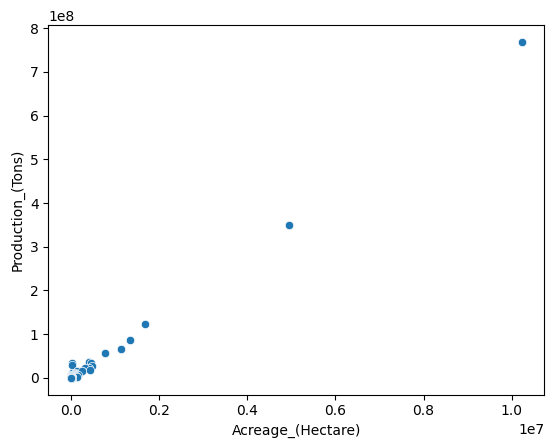

In [35]:
sns.scatterplot(data = df , x = "Acreage_(Hectare)", y = 'Production_(Tons)')

In [36]:
df_continent = df.groupby('Continent').sum()

In [37]:
df_continent

,Country,Production_(Tons),Production_per_Person(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [38]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

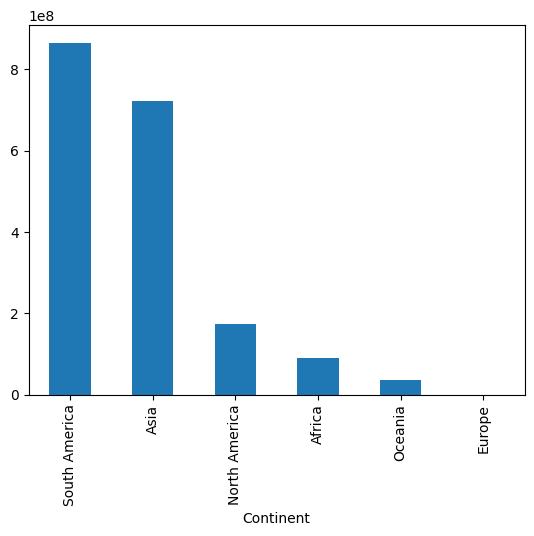

In [39]:
df_continent['Production_(Tons)'].sort_values(ascending= False).plot(kind = 'bar')

<Axes: xlabel='Continent'>

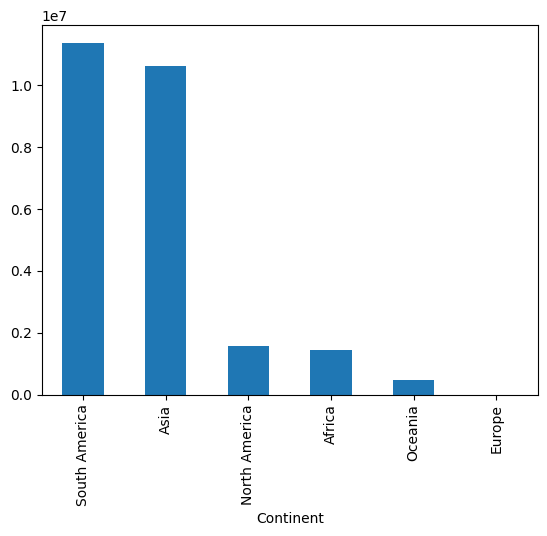

In [40]:
df_continent['Acreage_(Hectare)'].sort_values(ascending= False).plot(kind = 'bar')

In [41]:
df_continent['number_of_countries'] = df.groupby('Continent').count()['Country']

In [42]:
df_continent

,Country,Production_(Tons),Production_per_Person(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


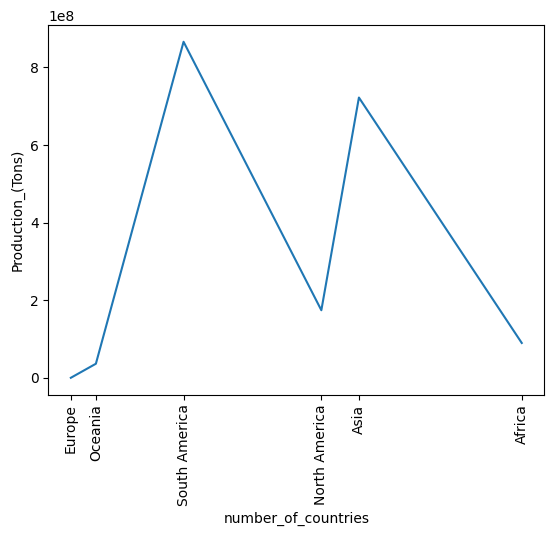

In [43]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent , x = 'number_of_countries',y = 'Production_(Tons)')
plt.xticks(df_continent['number_of_countries'],continent_names,rotation = 90)
plt.show()

In [44]:
df_continent.corr(numeric_only = True)

,Production_(Tons),Production_per_Person(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),number_of_countries
Production_(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage_(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield_(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: ylabel='Production_(Tons)'>

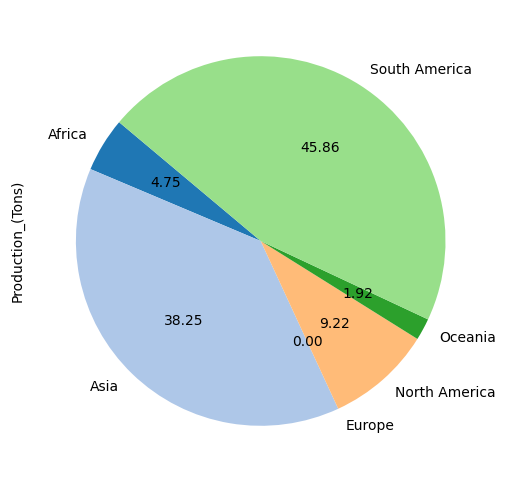

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
df_continent['Production_(Tons)'].plot(kind = 'pie' , autopct = '%.2f',startangle=140,colors=plt.cm.tab20.colors)